# Heart Risk Assessment Using Machine Learning Classifiers on Wearable IoT Devices

In [1]:
# Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

## Importing dataset

In [3]:
df_train = pd.read_csv("Dataset.csv", header=None)
df_train

0         1         2         3         4         5         6    \
0      0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87550  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87551  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87552  0.858228  0.645570  0.845570  0.248101  0.167089  0.131646  0.121519   
87553  0.901506  0.845886  0.800695  0.748552  0.687138  0.599073  0.512167   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
87549  0.396491  0.284211  0.136842  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87550  0.001667  0.000000  0.013333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87551  0.387755  0.322449  0.191837  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87552  0.121519  0.118987  0.103797  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87553  0.427578  0.395133  0.402086  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
87549  0.0  0.0  4.0  
87550  0.0  0.0  4.0  
87551  0.0  0.0  4.0  
87552  0.0  0.0  4.0  
87553  0.0  0.0  4.0  

[87554 rows x 188 columns]

### show one data

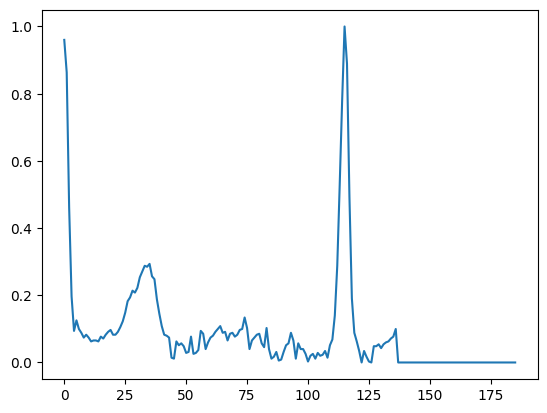

In [4]:
plt.plot(df_train.iloc[1,:186])

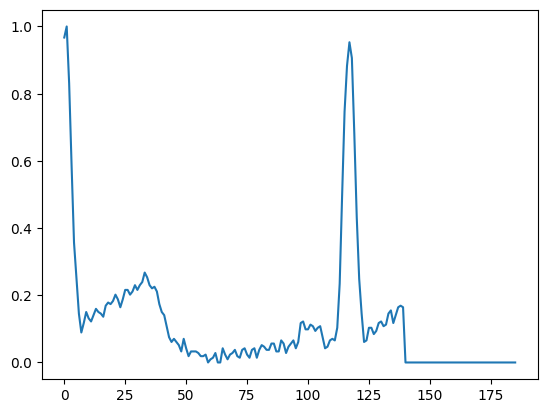

In [5]:
plt.plot(df_train.iloc[4,:186])

## Dataset 

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


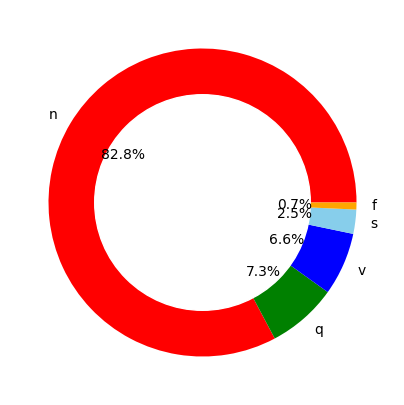

In [6]:
# plot the circle of value counts in dataset
def plot_equilibre(equilibre):
    plt.figure(figsize=(5,5))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
print(df_train[187].value_counts())
plot_equilibre(df_train[187].value_counts())

In [7]:
# Defining Dependent and independent variables

In [8]:
X= df_train.values[:, :-1]
X

array([[0.97794116, 0.92647058, 0.68137252, ..., 0.        , 0.        ,
        0.        ],
       [0.96011394, 0.86324787, 0.46153846, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.65945947, 0.18648648, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90612245, 0.62448978, 0.59591836, ..., 0.        , 0.        ,
        0.        ],
       [0.85822785, 0.64556962, 0.84556961, ..., 0.        , 0.        ,
        0.        ],
       [0.90150636, 0.84588647, 0.80069524, ..., 0.        , 0.        ,
        0.        ]])

In [9]:
y= df_train.values[:, -1].astype(int)
y

array([0, 0, 0, ..., 4, 4, 4])

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(70043, 187)

In [12]:
X_test.shape

(17511, 187)

In [25]:
labels = ["Normal",
          "Artial Premature",
          "Premature ventricular contraction",
          "Fusion of ventricular and normal",
          "Fusion of paced and normal"]

In [26]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [27]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# Knearest Neighbours Classifier

KNN Classifier Accuracy    : 96.51076466221232
KNN Classifier Precision   : 92.07132734527947
KNN Classifier Recall      : 79.39902043717669
KNN Classifier FSCORE      : 84.76812921313184

 KNN Classifier classification report
                                    precision    recall  f1-score   support

                           Normal       0.99      0.97      0.98     14932
                 Artial Premature       0.61      0.89      0.72       290
Premature ventricular contraction       0.81      0.91      0.85       990
 Fusion of ventricular and normal       0.62      0.85      0.72       106
       Fusion of paced and normal       0.94      0.99      0.96      1193

                         accuracy                           0.97     17511
                        macro avg       0.79      0.92      0.85     17511
                     weighted avg       0.97      0.97      0.97     17511



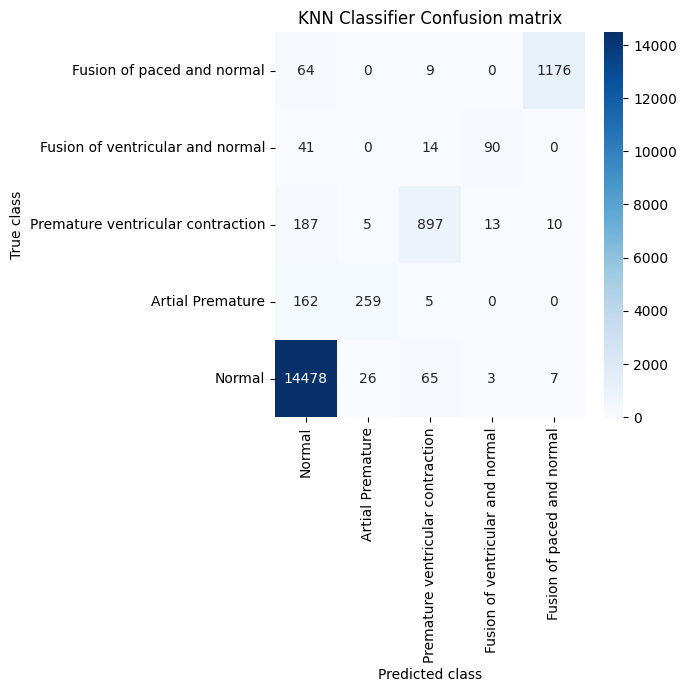

In [33]:
# Check if the pkl file exists
if os.path.exists('KNN_weights.pkl'):
    # Load the model from the pkl file
    classifier= joblib.load('KNN_weights.pkl')
    predict = classifier.predict(X_test)
    calculateMetrics("KNN Classifier", predict, y_test)
else:
    classifier = KNeighborsClassifier(n_neighbors=20)
    # Train the classifier on the training data
    classifier.fit(X_train, y_train)
    # Make predictions on the test data
    predict=classifier.predict(X_test)
    # Save the model weights to a pkl file
    joblib.dump(classifier, 'KNN_weights.pkl')
    print("KNN classifier_model trained and model weights saved.")
    calculateMetrics("KNeighborsClassifier", predict, y_test)

# RandomForestClassifier

rf_classifier_model trained and model weights saved.
RandomForestClassifier Accuracy    : 97.48729370110216
RandomForestClassifier Precision   : 96.46819735940551
RandomForestClassifier Recall      : 81.44330497363718
RandomForestClassifier FSCORE      : 87.57155572673732

 RandomForestClassifier classification report
                                    precision    recall  f1-score   support

                           Normal       1.00      0.97      0.99     14935
                 Artial Premature       0.63      0.98      0.77       272
Premature ventricular contraction       0.87      0.96      0.92      1005
 Fusion of ventricular and normal       0.62      0.91      0.74        99
       Fusion of paced and normal       0.96      0.99      0.97      1200

                         accuracy                           0.97     17511
                        macro avg       0.81      0.96      0.88     17511
                     weighted avg       0.98      0.97      0.98     17511



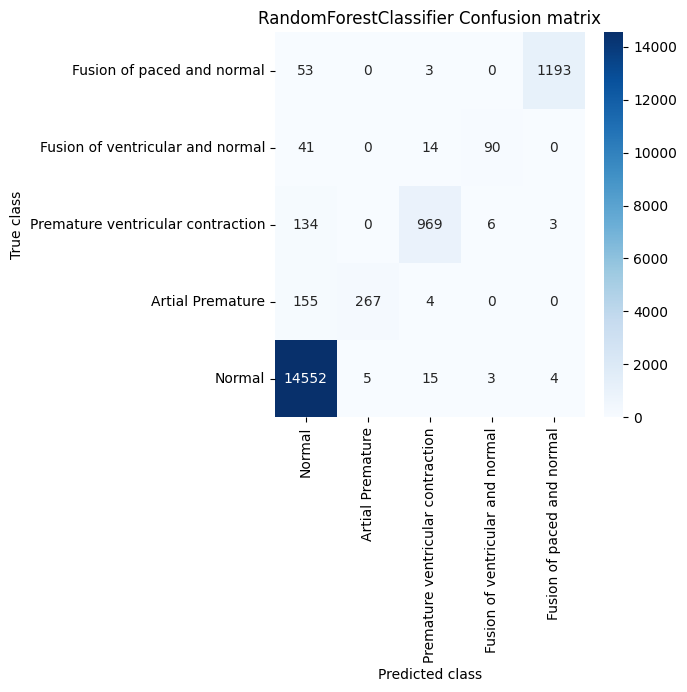

In [34]:
# Check if the pkl file exists
if os.path.exists('rf_classifier_weights.pkl'):
    # Load the model from the pkl file
    rf_classifier= joblib.load('rf_classifier_weights.pkl')
    predict = rf_classifier.predict(X_test)
    calculateMetrics("RandomForestClassifier", predict, y_test)
else:
    rf_classifier = RandomForestClassifier()
    # Train the classifier on the training data
    rf_classifier.fit(X_train, y_train)
    # Make predictions on the test data
    predict=rf_classifier.predict(X_test)
    joblib.dump(rf_classifier, 'rf_classifier_weights.pkl')
    print("rf_classifier_model trained and model weights saved.")
    calculateMetrics("RandomForestClassifier", predict, y_test)

In [35]:
#Performance Comparision of both the algorithmns

In [36]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["KNeighborsClassifier", "RandomForestClassifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

Algorithm Name  Precison     Recall     FScore   Accuracy
0    KNeighborsClassifier  93.39492  83.779448  87.981507  97.264577
1  RandomForestClassifier  93.39492  83.779448  87.981507  97.264577

In [20]:
filename=r"test.csv"

In [21]:
dataset = pd.read_csv(filename)

A='Normal'
B='Artial Premature'
C='Premature ventricular contraction'
D='Fusion of ventricular and normal'
E='Fusion of paced and normal'

predict = rf_classifier.predict(dataset)
for i in range(len(predict)):
    if predict[i] == 0:
        print("{} :{} ".format(dataset.iloc[i,:],A))
    elif predict[i]== 1:
        print("{} :{} ".format(dataset.iloc[i, :],B))
    elif predict[i]== 2:
        print("{} :{} ".format(dataset.iloc[i, :],C))
    elif predict[i]==3:
        print("{} :{} ".format(dataset.iloc[i, :],D))
    else:
        print("{} :{} ".format(dataset.iloc[i,:],E))


1.00E+00       0.908
7.58E-01       0.784
1.12E-01       0.531
0.00E+00       0.363
8.06E-02       0.366
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 0, Length: 187, dtype: float64 :Normal 
1.00E+00       0.730
7.58E-01       0.212
1.12E-01       0.000
0.00E+00       0.119
8.06E-02       0.102
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.910
1.12E-01       0.681
0.00E+00       0.473
8.06E-02       0.229
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2, Length: 187, dtype: float64 :Normal 
1.00E+00       0.570
7.58E-01       0.399
1.12E-01       0.238
0.00E+00       0.148
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0

1.00E+00       1.0000
7.58E-01       0.8000
1.12E-01       0.1530
0.00E+00       0.0129
8.06E-02       0.0753
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 201, Length: 187, dtype: float64 :Normal 
1.00E+00       0.956
7.58E-01       0.855
1.12E-01       0.679
0.00E+00       0.514
8.06E-02       0.306
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 202, Length: 187, dtype: float64 :Normal 
1.00E+00       0.989
7.58E-01       0.974
1.12E-01       0.613
0.00E+00       0.386
8.06E-02       0.363
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 203, Length: 187, dtype: float64 :Normal 
1.00E+00       0.785
7.58E-01       0.794
1.12E-01       0.588
0.00E+00       0.303
8.06E-02       0.136
               ...  
0.00E+00.60    0.000
0.00E

1.00E+00       0.8960
7.58E-01       1.0000
1.12E-01       0.4860
0.00E+00       0.0488
8.06E-02       0.2250
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 333, Length: 187, dtype: float64 :Normal 
1.00E+00       0.986
7.58E-01       0.965
1.12E-01       0.654
0.00E+00       0.346
8.06E-02       0.370
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 334, Length: 187, dtype: float64 :Normal 
1.00E+00       0.96300
7.58E-01       0.81400
1.12E-01       0.29200
0.00E+00       0.00997
8.06E-02       0.07310
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 335, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9310
7.58E-01       0.9940
1.12E-01       0.5610
0.00E+00       0.1680
8.06E-02       0.0875
                ... 

1.00E+00       1.000
7.58E-01       0.850
1.12E-01       0.388
0.00E+00       0.198
8.06E-02       0.121
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 521, Length: 187, dtype: float64 :Normal 
1.00E+00       0.00629
7.58E-01       0.43400
1.12E-01       0.61000
0.00E+00       0.01890
8.06E-02       0.00000
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 522, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9190
1.12E-01       0.4160
0.00E+00       0.0439
8.06E-02       0.0405
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 523, Length: 187, dtype: float64 :Normal 
1.00E+00       0.1810
7.58E-01       0.0581
1.12E-01       0.2650
0.00E+00       0.4230
8.06E-02       0.4900
                ... 

1.00E+00       0.9440
7.58E-01       0.8570
1.12E-01       0.4830
0.00E+00       0.0653
8.06E-02       0.0494
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 702, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0000
7.58E-01       0.0163
1.12E-01       0.1900
0.00E+00       0.2340
8.06E-02       0.2500
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 703, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6170
1.12E-01       0.0742
0.00E+00       0.0951
8.06E-02       0.1300
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 704, Length: 187, dtype: float64 :Normal 
1.00E+00       0.813
7.58E-01       0.745
1.12E-01       0.526
0.00E+00       0.307
8.06E-02       0.125
               ...  
0.00

1.00E+00       0.9810
7.58E-01       0.7370
1.12E-01       0.1830
0.00E+00       0.0000
8.06E-02       0.0941
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 814, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9180
7.58E-01       0.9390
1.12E-01       0.4130
0.00E+00       0.0912
8.06E-02       0.0447
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 815, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.764
1.12E-01       0.601
0.00E+00       0.386
8.06E-02       0.193
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 816, Length: 187, dtype: float64 :Normal 
1.00E+00       0.86700
7.58E-01       0.39600
1.12E-01       0.00966
0.00E+00       0.00000
8.06E-02       0.02420
                ...   
0.0

1.00E+00       1.0000
7.58E-01       0.6380
1.12E-01       0.0787
0.00E+00       0.0630
8.06E-02       0.1050
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 906, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8730
7.58E-01       0.7900
1.12E-01       0.5800
0.00E+00       0.3330
8.06E-02       0.0886
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 907, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.912
1.12E-01       0.471
0.00E+00       0.162
8.06E-02       0.220
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 908, Length: 187, dtype: float64 :Normal 
1.00E+00       0.763
7.58E-01       0.649
1.12E-01       0.390
0.00E+00       0.301
8.06E-02       0.185
               ...  
0.00E+00.60    

1.00E+00       1.0000
7.58E-01       0.7430
1.12E-01       0.1180
0.00E+00       0.0749
8.06E-02       0.2140
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1077, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.903
1.12E-01       0.735
0.00E+00       0.492
8.06E-02       0.265
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1078, Length: 187, dtype: float64 :Normal 
1.00E+00       0.593
7.58E-01       0.789
1.12E-01       1.000
0.00E+00       0.469
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1079, Length: 187, dtype: float64 :Normal 
1.00E+00       0.862
7.58E-01       0.855
1.12E-01       0.677
0.00E+00       0.375
8.06E-02       0.119
               ...  
0.00E+00.60    0.000
0.

1.00E+00       0.9650
7.58E-01       0.9920
1.12E-01       0.4230
0.00E+00       0.0526
8.06E-02       0.0078
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1208, Length: 187, dtype: float64 :Normal 
1.00E+00       0.883
7.58E-01       0.827
1.12E-01       0.480
0.00E+00       0.109
8.06E-02       0.119
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1209, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.4760
1.12E-01       0.2780
0.00E+00       0.1340
8.06E-02       0.0856
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1210, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8870
7.58E-01       0.9150
1.12E-01       0.6110
0.00E+00       0.0769
8.06E-02       0.0000
                ...  
0.00E+

1.00E+00       1.000
7.58E-01       0.535
1.12E-01       0.160
0.00E+00       0.188
8.06E-02       0.104
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1341, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.635
1.12E-01       0.480
0.00E+00       0.264
8.06E-02       0.183
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1342, Length: 187, dtype: float64 :Normal 
1.00E+00       0.746
7.58E-01       0.604
1.12E-01       0.460
0.00E+00       0.239
8.06E-02       0.132
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1343, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.499
1.12E-01       0.334
0.00E+00       0.161
8.06E-02       0.116
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       0.9780
7.58E-01       0.9550
1.12E-01       0.4490
0.00E+00       0.1090
8.06E-02       0.0543
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1558, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9760
7.58E-01       0.8710
1.12E-01       0.3060
0.00E+00       0.0393
8.06E-02       0.2560
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1559, Length: 187, dtype: float64 :Normal 
1.00E+00       0.985
7.58E-01       0.965
1.12E-01       0.617
0.00E+00       0.532
8.06E-02       0.364
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1560, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9870
7.58E-01       0.7190
1.12E-01       0.1530
0.00E+00       0.0638
8.06E-02       0.1190
                ...  
0.00E+

1.00E+00       1.0000
7.58E-01       0.6400
1.12E-01       0.0887
0.00E+00       0.1480
8.06E-02       0.1100
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1738, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9940
7.58E-01       0.8920
1.12E-01       0.5460
0.00E+00       0.2400
8.06E-02       0.0712
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1739, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.828
1.12E-01       0.168
0.00E+00       0.000
8.06E-02       0.242
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1740, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6930
1.12E-01       0.0000
0.00E+00       0.0417
8.06E-02       0.0439
                ...  
0.00E+

1.00E+00       0.7030
7.58E-01       0.4980
1.12E-01       0.0000
0.00E+00       0.0868
8.06E-02       0.1100
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1898, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.937
1.12E-01       0.724
0.00E+00       0.537
8.06E-02       0.309
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1899, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9510
7.58E-01       1.0000
1.12E-01       0.6060
0.00E+00       0.1320
8.06E-02       0.0394
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1900, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.972
1.12E-01       0.793
0.00E+00       0.558
8.06E-02       0.345
               ...  
0.00E+00.60 

1.00E+00       0.959
7.58E-01       0.885
1.12E-01       0.323
0.00E+00       0.000
8.06E-02       0.232
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2154, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.535
1.12E-01       0.180
0.00E+00       0.202
8.06E-02       0.122
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2155, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9020
1.12E-01       0.2940
0.00E+00       0.0265
8.06E-02       0.1990
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2156, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9710
7.58E-01       0.8410
1.12E-01       0.4760
0.00E+00       0.1490
8.06E-02       0.0939
                ...  
0.00E+00.60    0.

1.00E+00       0.940
7.58E-01       0.567
1.12E-01       0.106
0.00E+00       0.155
8.06E-02       0.155
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2387, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.699
1.12E-01       0.317
0.00E+00       0.251
8.06E-02       0.240
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2388, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6520
1.12E-01       0.0965
0.00E+00       0.1670
8.06E-02       0.1550
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2389, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.5500
1.12E-01       0.0633
0.00E+00       0.0767
8.06E-02       0.1070
                ...  
0.00E+00.60    0.

1.00E+00       0.6060
7.58E-01       0.9170
1.12E-01       0.9030
0.00E+00       0.1020
8.06E-02       0.0602
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2571, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.932
1.12E-01       0.753
0.00E+00       0.451
8.06E-02       0.210
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2572, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.472
1.12E-01       0.269
0.00E+00       0.140
8.06E-02       0.099
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2573, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.886
1.12E-01       0.418
0.00E+00       0.114
8.06E-02       0.158
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.829
1.12E-01       0.438
0.00E+00       0.147
8.06E-02       0.103
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2966, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6280
1.12E-01       0.1090
0.00E+00       0.0814
8.06E-02       0.1510
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2967, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.5980
1.12E-01       0.0610
0.00E+00       0.0935
8.06E-02       0.1630
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2968, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6570
1.12E-01       0.1120
0.00E+00       0.0597
8.06E-02       0.1270
                ...  
0.00E+

1.00E+00       1.000
7.58E-01       0.749
1.12E-01       0.260
0.00E+00       0.225
8.06E-02       0.216
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3126, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6020
1.12E-01       0.0502
0.00E+00       0.1000
8.06E-02       0.1680
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3127, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6730
1.12E-01       0.2250
0.00E+00       0.0871
8.06E-02       0.0360
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3128, Length: 187, dtype: float64 :Normal 
1.00E+00       0.970
7.58E-01       0.768
1.12E-01       0.595
0.00E+00       0.375
8.06E-02       0.229
               ...  
0.00E+00.60 

1.00E+00       1.000
7.58E-01       0.792
1.12E-01       0.439
0.00E+00       0.253
8.06E-02       0.213
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3364, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.932
1.12E-01       0.685
0.00E+00       0.399
8.06E-02       0.157
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3365, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.670
1.12E-01       0.111
0.00E+00       0.158
8.06E-02       0.178
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3366, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.904
1.12E-01       0.493
0.00E+00       0.208
8.06E-02       0.266
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       0.990
7.58E-01       0.844
1.12E-01       0.219
0.00E+00       0.000
8.06E-02       0.240
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3508, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8430
1.12E-01       0.1510
0.00E+00       0.0934
8.06E-02       0.1100
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3509, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.875
1.12E-01       0.249
0.00E+00       0.106
8.06E-02       0.081
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3510, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9890
7.58E-01       0.7320
1.12E-01       0.0676
0.00E+00       0.0000
8.06E-02       0.1300
                ...  
0.00E+00.60    0.

1.00E+00       0.974
7.58E-01       0.917
1.12E-01       0.567
0.00E+00       0.000
8.06E-02       0.158
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3632, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.893
1.12E-01       0.632
0.00E+00       0.354
8.06E-02       0.143
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3633, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.965
1.12E-01       0.734
0.00E+00       0.462
8.06E-02       0.272
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3634, Length: 187, dtype: float64 :Normal 
1.00E+00       0.996
7.58E-01       0.918
1.12E-01       0.548
0.00E+00       0.165
8.06E-02       0.163
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       1.00000
7.58E-01       0.88200
1.12E-01       0.40900
0.00E+00       0.00576
8.06E-02       0.07780
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 3726, Length: 187, dtype: float64 :Normal 
1.00E+00       0.872
7.58E-01       0.735
1.12E-01       0.207
0.00E+00       0.000
8.06E-02       0.103
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3727, Length: 187, dtype: float64 :Normal 
1.00E+00       0.79400
7.58E-01       0.63200
1.12E-01       0.00972
0.00E+00       0.00972
8.06E-02       0.00000
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 3728, Length: 187, dtype: float64 :Normal 
1.00E+00       0.5220
7.58E-01       0.4780
1.12E-01       0.1560
0.00E+00       0.0273
8.06E-02       0.0574
      

1.00E+00       1.0000
7.58E-01       0.9350
1.12E-01       0.4930
0.00E+00       0.0463
8.06E-02       0.0278
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3858, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.833
1.12E-01       0.537
0.00E+00       0.191
8.06E-02       0.102
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3859, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9740
7.58E-01       0.6640
1.12E-01       0.1720
0.00E+00       0.0370
8.06E-02       0.0741
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3860, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9700
7.58E-01       0.7070
1.12E-01       0.2840
0.00E+00       0.0359
8.06E-02       0.0000
                ...  
0.00E+

1.00E+00       0.809
7.58E-01       0.727
1.12E-01       0.366
0.00E+00       0.282
8.06E-02       0.357
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3995, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9750
1.12E-01       0.4340
0.00E+00       0.0182
8.06E-02       0.1470
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3996, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.859
1.12E-01       0.647
0.00E+00       0.272
8.06E-02       0.136
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3997, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.857
1.12E-01       0.589
0.00E+00       0.356
8.06E-02       0.248
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.900
1.12E-01       0.697
0.00E+00       0.453
8.06E-02       0.229
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4178, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9130
7.58E-01       0.8290
1.12E-01       0.3420
0.00E+00       0.0232
8.06E-02       0.0696
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4179, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.977
1.12E-01       0.822
0.00E+00       0.529
8.06E-02       0.476
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4180, Length: 187, dtype: float64 :Normal 
1.00E+00       0.959
7.58E-01       0.934
1.12E-01       0.605
0.00E+00       0.324
8.06E-02       0.266
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.951
1.12E-01       0.702
0.00E+00       0.521
8.06E-02       0.551
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4543, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9690
7.58E-01       0.6610
1.12E-01       0.1840
0.00E+00       0.0236
8.06E-02       0.0630
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4544, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.894
1.12E-01       0.444
0.00E+00       0.160
8.06E-02       0.201
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4545, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.924
1.12E-01       0.531
0.00E+00       0.187
8.06E-02       0.202
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.878
1.12E-01       0.497
0.00E+00       0.226
8.06E-02       0.125
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4682, Length: 187, dtype: float64 :Normal 
1.00E+00       0.952
7.58E-01       0.868
1.12E-01       0.674
0.00E+00       0.487
8.06E-02       0.252
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4683, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0393
7.58E-01       0.1210
1.12E-01       0.2780
0.00E+00       0.4070
8.06E-02       0.5000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4684, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9340
7.58E-01       0.8460
1.12E-01       0.3720
0.00E+00       0.0731
8.06E-02       0.1360
                ...  
0.00E+00.60    0.

1.00E+00       1.0000
7.58E-01       0.8260
1.12E-01       0.4070
0.00E+00       0.0971
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4821, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8380
1.12E-01       0.3590
0.00E+00       0.0812
8.06E-02       0.0728
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4822, Length: 187, dtype: float64 :Normal 
1.00E+00       0.926
7.58E-01       0.853
1.12E-01       0.247
0.00E+00       0.000
8.06E-02       0.213
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4823, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8830
7.58E-01       0.7060
1.12E-01       0.0777
0.00E+00       0.0841
8.06E-02       0.1100
                ...  
0.00E+

1.00E+00       0.9040
7.58E-01       1.0000
1.12E-01       0.6190
0.00E+00       0.1530
8.06E-02       0.0451
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4921, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7970
1.12E-01       0.2940
0.00E+00       0.0471
8.06E-02       0.0706
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4922, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9620
7.58E-01       0.7830
1.12E-01       0.1540
0.00E+00       0.0000
8.06E-02       0.0893
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4923, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.865
1.12E-01       0.716
0.00E+00       0.604
8.06E-02       0.581
               ...  
0

1.00E+00       1.000
7.58E-01       0.687
1.12E-01       0.116
0.00E+00       0.081
8.06E-02       0.165
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5079, Length: 187, dtype: float64 :Normal 
1.00E+00       0.016
7.58E-01       0.117
1.12E-01       0.248
0.00E+00       0.392
8.06E-02       0.472
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5080, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9590
7.58E-01       0.9770
1.12E-01       0.5360
0.00E+00       0.1010
8.06E-02       0.0331
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5081, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.921
1.12E-01       0.517
0.00E+00       0.339
8.06E-02       0.327
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.918
1.12E-01       0.733
0.00E+00       0.443
8.06E-02       0.258
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5166, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.833
1.12E-01       0.549
0.00E+00       0.245
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5167, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.903
1.12E-01       0.661
0.00E+00       0.482
8.06E-02       0.430
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5168, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7420
1.12E-01       0.2580
0.00E+00       0.0556
8.06E-02       0.0628
                ...  
0.00E+00.60    0.0000
0.00E+

1.00E+00       1.0000
7.58E-01       0.8200
1.12E-01       0.5060
0.00E+00       0.1270
8.06E-02       0.0375
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5358, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6610
1.12E-01       0.1520
0.00E+00       0.0147
8.06E-02       0.0713
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5359, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.787
1.12E-01       0.177
0.00E+00       0.115
8.06E-02       0.126
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5360, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9880
7.58E-01       0.7760
1.12E-01       0.0000
0.00E+00       0.0364
8.06E-02       0.0222
                ...  
0.00E+

1.00E+00       0.9860
7.58E-01       0.8490
1.12E-01       0.3560
0.00E+00       0.0869
8.06E-02       0.1700
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5540, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.727
1.12E-01       0.339
0.00E+00       0.242
8.06E-02       0.284
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5541, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.579
1.12E-01       0.038
0.00E+00       0.000
8.06E-02       0.019
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5542, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.908
1.12E-01       0.672
0.00E+00       0.395
8.06E-02       0.183
               ...  
0.00E+00.60    0.000
0.

1.00E+00       0.98700
7.58E-01       0.89100
1.12E-01       0.49800
0.00E+00       0.00873
8.06E-02       0.04370
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 5950, Length: 187, dtype: float64 :Normal 
1.00E+00       0.864
7.58E-01       0.665
1.12E-01       0.253
0.00E+00       0.212
8.06E-02       0.218
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5951, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8560
1.12E-01       0.2270
0.00E+00       0.0791
8.06E-02       0.1100
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5952, Length: 187, dtype: float64 :Normal 
1.00E+00       0.929
7.58E-01       0.942
1.12E-01       0.689
0.00E+00       0.411
8.06E-02       0.124
               ...  
0

1.00E+00       0.939
7.58E-01       0.924
1.12E-01       0.405
0.00E+00       0.000
8.06E-02       0.104
               ...  
0.00E+00.60    0.342
0.00E+00.61    0.354
0.00E+00.62    0.356
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6078, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.962
1.12E-01       0.773
0.00E+00       0.512
8.06E-02       0.470
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6079, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.671
1.12E-01       0.174
0.00E+00       0.172
8.06E-02       0.131
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6080, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.846
1.12E-01       0.478
0.00E+00       0.348
8.06E-02       0.308
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       0.80200
7.58E-01       0.61600
1.12E-01       0.09270
0.00E+00       0.00647
8.06E-02       0.00000
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 6204, Length: 187, dtype: float64 :Normal 
1.00E+00       0.981
7.58E-01       0.934
1.12E-01       0.359
0.00E+00       0.000
8.06E-02       0.252
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6205, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0336
7.58E-01       0.0940
1.12E-01       0.2680
0.00E+00       0.3790
8.06E-02       0.4700
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6206, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8060
1.12E-01       0.3810
0.00E+00       0.0960
8.06E-02       0.0207
                .

1.00E+00       0.288
7.58E-01       0.506
1.12E-01       0.769
0.00E+00       0.135
8.06E-02       0.154
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6363, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.941
1.12E-01       0.306
0.00E+00       0.000
8.06E-02       0.245
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6364, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8630
1.12E-01       0.6130
0.00E+00       0.2780
8.06E-02       0.0802
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6365, Length: 187, dtype: float64 :Normal 
1.00E+00       0.966
7.58E-01       0.886
1.12E-01       0.658
0.00E+00       0.259
8.06E-02       0.137
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.853
1.12E-01       0.211
0.00E+00       0.163
8.06E-02       0.153
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6517, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.916
1.12E-01       0.470
0.00E+00       0.396
8.06E-02       0.446
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6518, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.851
1.12E-01       0.187
0.00E+00       0.119
8.06E-02       0.109
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6519, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7860
1.12E-01       0.2990
0.00E+00       0.0726
8.06E-02       0.0855
                ...  
0.00E+00.60    0.0000
0.00E+

1.00E+00       0.6390
7.58E-01       0.5250
1.12E-01       0.0840
0.00E+00       0.0294
8.06E-02       0.0588
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6642, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9320
7.58E-01       0.7970
1.12E-01       0.1930
0.00E+00       0.0103
8.06E-02       0.0945
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6643, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9620
7.58E-01       0.9960
1.12E-01       0.4450
0.00E+00       0.1510
8.06E-02       0.0945
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6644, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8680
1.12E-01       0.4150
0.00E+00       0.0344
8.06E-02       0.1510
                .

1.00E+00       1.0000
7.58E-01       0.7510
1.12E-01       0.1240
0.00E+00       0.0660
8.06E-02       0.0584
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6810, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9700
7.58E-01       0.7480
1.12E-01       0.0926
0.00E+00       0.0000
8.06E-02       0.1480
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6811, Length: 187, dtype: float64 :Normal 
1.00E+00       0.132
7.58E-01       0.270
1.12E-01       0.382
0.00E+00       0.539
8.06E-02       0.578
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6812, Length: 187, dtype: float64 :Normal 
1.00E+00       0.938
7.58E-01       0.730
1.12E-01       0.116
0.00E+00       0.000
8.06E-02       0.108
               ...  
0.00E+00.60 

1.00E+00       0.123
7.58E-01       0.181
1.12E-01       0.355
0.00E+00       0.510
8.06E-02       0.581
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6919, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7840
1.12E-01       0.1200
0.00E+00       0.0249
8.06E-02       0.1660
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6920, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7960
1.12E-01       0.1890
0.00E+00       0.0143
8.06E-02       0.1470
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6921, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.724
1.12E-01       0.414
0.00E+00       0.340
8.06E-02       0.286
               ...  
0.00E+00.60 

1.00E+00       0.967
7.58E-01       0.900
1.12E-01       0.389
0.00E+00       0.000
8.06E-02       0.141
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7037, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6750
1.12E-01       0.1020
0.00E+00       0.0863
8.06E-02       0.0305
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7038, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.884
1.12E-01       0.540
0.00E+00       0.126
8.06E-02       0.128
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7039, Length: 187, dtype: float64 :Normal 
1.00E+00       0.000
7.58E-01       0.129
1.12E-01       0.227
0.00E+00       0.364
8.06E-02       0.364
               ...  
0.00E+00.60    0.000
0.

1.00E+00       0.933
7.58E-01       0.856
1.12E-01       0.361
0.00E+00       0.000
8.06E-02       0.179
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7146, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7540
1.12E-01       0.0783
0.00E+00       0.0522
8.06E-02       0.2140
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7147, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8420
1.12E-01       0.3570
0.00E+00       0.0189
8.06E-02       0.2130
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7148, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9740
7.58E-01       0.8210
1.12E-01       0.3320
0.00E+00       0.0545
8.06E-02       0.0312
                ...  
0.00E+

1.00E+00       0.9710
7.58E-01       0.7110
1.12E-01       0.0623
0.00E+00       0.0549
8.06E-02       0.0916
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7268, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.4180
1.12E-01       0.1380
0.00E+00       0.1120
8.06E-02       0.0474
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7269, Length: 187, dtype: float64 :Normal 
1.00E+00       0.892
7.58E-01       0.856
1.12E-01       0.559
0.00E+00       0.333
8.06E-02       0.164
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7270, Length: 187, dtype: float64 :Normal 
1.00E+00       0.977
7.58E-01       0.917
1.12E-01       0.721
0.00E+00       0.561
8.06E-02       0.330
               ...  
0.00E+00.60 

1.00E+00       0.92400
7.58E-01       0.95300
1.12E-01       0.39400
0.00E+00       0.00169
8.06E-02       0.17800
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 7394, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.952
1.12E-01       0.589
0.00E+00       0.370
8.06E-02       0.325
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7395, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.903
1.12E-01       0.686
0.00E+00       0.507
8.06E-02       0.254
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7396, Length: 187, dtype: float64 :Normal 
1.00E+00       0.973
7.58E-01       0.894
1.12E-01       0.524
0.00E+00       0.000
8.06E-02       0.163
               ...  
0.00E+00.60 

1.00E+00       0.8780
7.58E-01       0.4460
1.12E-01       0.2760
0.00E+00       0.1410
8.06E-02       0.0541
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7588, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8680
7.58E-01       0.7560
1.12E-01       0.1650
0.00E+00       0.0948
8.06E-02       0.0773
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7589, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.929
1.12E-01       0.718
0.00E+00       0.574
8.06E-02       0.353
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7590, Length: 187, dtype: float64 :Normal 
1.00E+00       0.990
7.58E-01       1.000
1.12E-01       0.802
0.00E+00       0.309
8.06E-02       0.101
               ...  
0.00E+00.60 

1.00E+00       0.983
7.58E-01       0.932
1.12E-01       0.542
0.00E+00       0.397
8.06E-02       0.344
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7737, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9970
7.58E-01       0.7600
1.12E-01       0.2600
0.00E+00       0.0331
8.06E-02       0.0497
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7738, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.578
1.12E-01       0.265
0.00E+00       0.238
8.06E-02       0.252
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7739, Length: 187, dtype: float64 :Normal 
1.00E+00       0.826
7.58E-01       0.801
1.12E-01       0.608
0.00E+00       0.203
8.06E-02       0.210
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.0000
7.58E-01       0.8410
1.12E-01       0.4440
0.00E+00       0.0199
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7967, Length: 187, dtype: float64 :Normal 
1.00E+00       0.990
7.58E-01       0.898
1.12E-01       0.614
0.00E+00       0.390
8.06E-02       0.362
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7968, Length: 187, dtype: float64 :Normal 
1.00E+00       0.975
7.58E-01       0.905
1.12E-01       0.467
0.00E+00       0.105
8.06E-02       0.111
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7969, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9920
7.58E-01       0.9520
1.12E-01       0.5890
0.00E+00       0.1250
8.06E-02       0.0424
                ...  
0.00E+00.60    0.

1.00E+00       0.816
7.58E-01       0.746
1.12E-01       0.408
0.00E+00       0.259
8.06E-02       0.350
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8134, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.886
1.12E-01       0.524
0.00E+00       0.218
8.06E-02       0.150
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8135, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9920
7.58E-01       1.0000
1.12E-01       0.4920
0.00E+00       0.0246
8.06E-02       0.0205
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8136, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7520
1.12E-01       0.3070
0.00E+00       0.0272
8.06E-02       0.0401
                ...  
0.00E+00.60    0.

1.00E+00       0.9500
7.58E-01       0.3930
1.12E-01       0.0000
0.00E+00       0.0299
8.06E-02       0.0846
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8336, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.850
1.12E-01       0.550
0.00E+00       0.281
8.06E-02       0.114
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8337, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.544
1.12E-01       0.218
0.00E+00       0.180
8.06E-02       0.123
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8338, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.945
1.12E-01       0.574
0.00E+00       0.350
8.06E-02       0.343
               ...  
0.00E+00.60    0.000
0.

1.00E+00       0.9920
7.58E-01       1.0000
1.12E-01       0.5020
0.00E+00       0.0508
8.06E-02       0.0254
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8473, Length: 187, dtype: float64 :Normal 
1.00E+00       0.987
7.58E-01       0.826
1.12E-01       0.200
0.00E+00       0.000
8.06E-02       0.240
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8474, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9590
7.58E-01       0.9140
1.12E-01       0.6710
0.00E+00       0.2300
8.06E-02       0.0911
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8475, Length: 187, dtype: float64 :Normal 
1.00E+00       0.986
7.58E-01       0.902
1.12E-01       0.692
0.00E+00       0.472
8.06E-02       0.285
               ...  
0.00E+00.60 

1.00E+00       1.000
7.58E-01       0.894
1.12E-01       0.585
0.00E+00       0.229
8.06E-02       0.130
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8622, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9680
7.58E-01       0.9290
1.12E-01       0.5480
0.00E+00       0.0967
8.06E-02       0.0465
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8623, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8250
7.58E-01       0.7440
1.12E-01       0.4420
0.00E+00       0.1080
8.06E-02       0.0139
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8624, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.919
1.12E-01       0.570
0.00E+00       0.226
8.06E-02       0.216
               ...  
0.00E+00.60 

1.00E+00       1.000
7.58E-01       0.943
1.12E-01       0.576
0.00E+00       0.261
8.06E-02       0.106
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8782, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.684
1.12E-01       0.277
0.00E+00       0.368
8.06E-02       0.419
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8783, Length: 187, dtype: float64 :Normal 
1.00E+00       0.492
7.58E-01       0.427
1.12E-01       0.316
0.00E+00       0.185
8.06E-02       0.215
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8784, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8880
1.12E-01       0.5010
0.00E+00       0.0550
8.06E-02       0.0236
                ...  
0.00E+00.60    0.0000
0.00E+

1.00E+00       0.9730
7.58E-01       0.8470
1.12E-01       0.5880
0.00E+00       0.3160
8.06E-02       0.0693
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8897, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9450
7.58E-01       0.9240
1.12E-01       0.5270
0.00E+00       0.2350
8.06E-02       0.0992
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8898, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.898
1.12E-01       0.485
0.00E+00       0.201
8.06E-02       0.106
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8899, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.941
1.12E-01       0.739
0.00E+00       0.559
8.06E-02       0.339
               ...  
0.00E+00.60 

1.00E+00       0.892
7.58E-01       0.704
1.12E-01       0.421
0.00E+00       0.182
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8977, Length: 187, dtype: float64 :Normal 
1.00E+00       0.869
7.58E-01       0.708
1.12E-01       0.422
0.00E+00       0.133
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8978, Length: 187, dtype: float64 :Normal 
1.00E+00       0.962
7.58E-01       0.823
1.12E-01       0.270
0.00E+00       0.000
8.06E-02       0.123
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8979, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.948
1.12E-01       0.746
0.00E+00       0.562
8.06E-02       0.348
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       0.974
7.58E-01       0.942
1.12E-01       0.487
0.00E+00       0.000
8.06E-02       0.103
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9146, Length: 187, dtype: float64 :Normal 
1.00E+00       0.990
7.58E-01       0.790
1.12E-01       0.208
0.00E+00       0.000
8.06E-02       0.169
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9147, Length: 187, dtype: float64 :Normal 
1.00E+00       0.986
7.58E-01       1.000
1.12E-01       0.716
0.00E+00       0.463
8.06E-02       0.421
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9148, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8710
1.12E-01       0.4660
0.00E+00       0.1720
8.06E-02       0.0751
                ...  
0.00E+00.60    0.0000
0.00E+

1.00E+00       1.0000
7.58E-01       0.8710
1.12E-01       0.1790
0.00E+00       0.0205
8.06E-02       0.1670
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9359, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.902
1.12E-01       0.521
0.00E+00       0.183
8.06E-02       0.192
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9360, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8700
7.58E-01       0.9530
1.12E-01       0.6250
0.00E+00       0.1480
8.06E-02       0.0217
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9361, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9490
7.58E-01       0.7110
1.12E-01       0.3600
0.00E+00       0.0000
8.06E-02       0.0593
                ...  
0.00E+

1.00E+00       1.0000
7.58E-01       0.6010
1.12E-01       0.0530
0.00E+00       0.0707
8.06E-02       0.1340
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9551, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9190
7.58E-01       0.6280
1.12E-01       0.0807
0.00E+00       0.1300
8.06E-02       0.0807
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9552, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.908
1.12E-01       0.331
0.00E+00       0.000
8.06E-02       0.234
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9553, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9920
7.58E-01       0.7030
1.12E-01       0.0000
0.00E+00       0.0738
8.06E-02       0.0574
                ...  
0.00E+

1.00E+00       1.0000
7.58E-01       0.7570
1.12E-01       0.0847
0.00E+00       0.0973
8.06E-02       0.1100
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9799, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.822
1.12E-01       0.593
0.00E+00       0.437
8.06E-02       0.312
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9800, Length: 187, dtype: float64 :Normal 
1.00E+00       0.87000
7.58E-01       0.58100
1.12E-01       0.00395
0.00E+00       0.00395
8.06E-02       0.09880
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 9801, Length: 187, dtype: float64 :Normal 
1.00E+00       0.110
7.58E-01       0.285
1.12E-01       0.420
0.00E+00       0.517
8.06E-02       0.566
               ...  
0

1.00E+00       0.942
7.58E-01       0.667
1.12E-01       0.000
0.00E+00       0.055
8.06E-02       0.107
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10024, Length: 187, dtype: float64 :Normal 
1.00E+00       0.000
7.58E-01       0.194
1.12E-01       0.340
0.00E+00       0.460
8.06E-02       0.515
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10025, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8820
1.12E-01       0.0848
0.00E+00       0.0000
8.06E-02       0.1640
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10026, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8210
1.12E-01       0.5000
0.00E+00       0.0935
8.06E-02       0.0000
                ...  
0.00E+00.60   

1.00E+00       1.000
7.58E-01       0.811
1.12E-01       0.364
0.00E+00       0.000
8.06E-02       0.196
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10234, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9000
7.58E-01       0.4980
1.12E-01       0.0188
0.00E+00       0.0000
8.06E-02       0.0439
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10235, Length: 187, dtype: float64 :Normal 
1.00E+00       0.7920
7.58E-01       0.6500
1.12E-01       0.2550
0.00E+00       0.0711
8.06E-02       0.1790
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10236, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.814
1.12E-01       0.157
0.00E+00       0.094
8.06E-02       0.255
               ...  
0.00E+00.

1.00E+00       1.0000
7.58E-01       0.8480
1.12E-01       0.3750
0.00E+00       0.1550
8.06E-02       0.0883
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10448, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9550
7.58E-01       0.9980
1.12E-01       0.6140
0.00E+00       0.1740
8.06E-02       0.0467
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10449, Length: 187, dtype: float64 :Normal 
1.00E+00       0.977
7.58E-01       0.898
1.12E-01       0.511
0.00E+00       0.177
8.06E-02       0.208
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10450, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9130
7.58E-01       0.7420
1.12E-01       0.4820
0.00E+00       0.1940
8.06E-02       0.0268
                ...  
0.0

1.00E+00       0.971
7.58E-01       0.821
1.12E-01       0.560
0.00E+00       0.306
8.06E-02       0.087
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10704, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9250
7.58E-01       0.3870
1.12E-01       0.0833
0.00E+00       0.1710
8.06E-02       0.1250
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10705, Length: 187, dtype: float64 :Normal 
1.00E+00       0.2500
7.58E-01       0.7950
1.12E-01       0.9770
0.00E+00       0.1970
8.06E-02       0.0227
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10706, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.927
1.12E-01       0.625
0.00E+00       0.462
8.06E-02       0.375
               ...  
0.00E+00.

1.00E+00       0.958
7.58E-01       0.815
1.12E-01       0.607
0.00E+00       0.536
8.06E-02       0.521
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10908, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.794
1.12E-01       0.599
0.00E+00       0.429
8.06E-02       0.292
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10909, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0665
7.58E-01       0.1500
1.12E-01       0.3090
0.00E+00       0.4360
8.06E-02       0.5200
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10910, Length: 187, dtype: float64 :Normal 
1.00E+00       0.954
7.58E-01       0.880
1.12E-01       0.143
0.00E+00       0.000
8.06E-02       0.136
               ...  
0.00E+00.60    0.000

1.00E+00       1.0000
7.58E-01       0.8760
1.12E-01       0.5740
0.00E+00       0.0725
8.06E-02       0.0755
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11087, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.916
1.12E-01       0.708
0.00E+00       0.440
8.06E-02       0.212
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11088, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9640
7.58E-01       0.9470
1.12E-01       0.5240
0.00E+00       0.1170
8.06E-02       0.0407
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11089, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9470
1.12E-01       0.5180
0.00E+00       0.0395
8.06E-02       0.0000
                ...  
0.0

1.00E+00       0.9820
7.58E-01       0.9100
1.12E-01       0.7110
0.00E+00       0.2610
8.06E-02       0.0972
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11207, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9680
7.58E-01       0.9060
1.12E-01       0.4090
0.00E+00       0.1430
8.06E-02       0.0842
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11208, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.894
1.12E-01       0.673
0.00E+00       0.476
8.06E-02       0.234
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11209, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.887
1.12E-01       0.655
0.00E+00       0.452
8.06E-02       0.214
               ...  
0.00E+00.

1.00E+00       0.8510
7.58E-01       0.4830
1.12E-01       0.0575
0.00E+00       0.0766
8.06E-02       0.1190
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11301, Length: 187, dtype: float64 :Normal 
1.00E+00       0.420
7.58E-01       0.858
1.12E-01       0.722
0.00E+00       0.000
8.06E-02       0.364
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11302, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.962
1.12E-01       0.768
0.00E+00       0.517
8.06E-02       0.355
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11303, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.871
1.12E-01       0.608
0.00E+00       0.407
8.06E-02       0.361
               ...  
0.00E+00.60    0.000

1.00E+00       0.928
7.58E-01       0.850
1.12E-01       0.581
0.00E+00       0.287
8.06E-02       0.102
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11421, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9020
7.58E-01       0.8460
1.12E-01       0.6650
0.00E+00       0.3020
8.06E-02       0.0123
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11422, Length: 187, dtype: float64 :Normal 
1.00E+00       0.950
7.58E-01       0.812
1.12E-01       0.164
0.00E+00       0.000
8.06E-02       0.120
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11423, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8850
7.58E-01       1.0000
1.12E-01       0.6300
0.00E+00       0.1440
8.06E-02       0.0422
                ...  
0.00E+00.60   

1.00E+00       0.8950
7.58E-01       0.4910
1.12E-01       0.0359
0.00E+00       0.0749
8.06E-02       0.0988
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11725, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.811
1.12E-01       0.422
0.00E+00       0.215
8.06E-02       0.100
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11726, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7750
1.12E-01       0.2550
0.00E+00       0.0302
8.06E-02       0.0522
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11727, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8640
1.12E-01       0.4770
0.00E+00       0.0851
8.06E-02       0.0681
                ...  
0.0

1.00E+00       1.0000
7.58E-01       0.4440
1.12E-01       0.1070
0.00E+00       0.0888
8.06E-02       0.1120
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12022, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.605
1.12E-01       0.427
0.00E+00       0.272
8.06E-02       0.232
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12023, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.964
1.12E-01       0.699
0.00E+00       0.451
8.06E-02       0.244
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12024, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.540
1.12E-01       0.368
0.00E+00       0.217
8.06E-02       0.140
               ...  
0.00E+00.60    0.000

1.00E+00       0.9810
7.58E-01       1.0000
1.12E-01       0.5070
0.00E+00       0.0257
8.06E-02       0.1480
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12142, Length: 187, dtype: float64 :Normal 
1.00E+00       0.982
7.58E-01       0.876
1.12E-01       0.457
0.00E+00       0.227
8.06E-02       0.202
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12143, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9310
1.12E-01       0.4420
0.00E+00       0.0000
8.06E-02       0.0431
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12144, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7900
1.12E-01       0.3990
0.00E+00       0.0745
8.06E-02       0.0000
                ...  
0.0

1.00E+00       0.931
7.58E-01       0.894
1.12E-01       0.649
0.00E+00       0.447
8.06E-02       0.287
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12385, Length: 187, dtype: float64 :Normal 
1.00E+00       0.952
7.58E-01       0.856
1.12E-01       0.263
0.00E+00       0.000
8.06E-02       0.242
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12386, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.932
1.12E-01       0.720
0.00E+00       0.518
8.06E-02       0.282
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12387, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6710
1.12E-01       0.3770
0.00E+00       0.1860
8.06E-02       0.0719
                ...  
0.00E+00.60    0.0000
0.0

1.00E+00       1.000
7.58E-01       0.984
1.12E-01       0.521
0.00E+00       0.197
8.06E-02       0.124
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12659, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9760
7.58E-01       0.8870
1.12E-01       0.3500
0.00E+00       0.0496
8.06E-02       0.1900
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12660, Length: 187, dtype: float64 :Normal 
1.00E+00       0.981
7.58E-01       0.915
1.12E-01       0.563
0.00E+00       0.000
8.06E-02       0.116
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12661, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9050
1.12E-01       0.4290
0.00E+00       0.0714
8.06E-02       0.0782
                ...  
0.00E+00.60   

1.00E+00       0.0000
7.58E-01       0.0952
1.12E-01       0.2160
0.00E+00       0.3750
8.06E-02       0.4760
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12772, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.924
1.12E-01       0.517
0.00E+00       0.371
8.06E-02       0.371
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12773, Length: 187, dtype: float64 :Normal 
1.00E+00       0.762
7.58E-01       0.684
1.12E-01       0.502
0.00E+00       0.354
8.06E-02       0.293
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12774, Length: 187, dtype: float64 :Normal 
1.00E+00       1.00000
7.58E-01       0.60300
1.12E-01       0.02120
0.00E+00       0.00212
8.06E-02       0.08920
                ...   
0.00E+00

1.00E+00       1.0000
7.58E-01       0.6810
1.12E-01       0.1760
0.00E+00       0.0347
8.06E-02       0.0941
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12946, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.912
1.12E-01       0.809
0.00E+00       0.573
8.06E-02       0.475
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12947, Length: 187, dtype: float64 :Normal 
1.00E+00       0.1090
7.58E-01       0.0833
1.12E-01       0.2550
0.00E+00       0.3390
8.06E-02       0.5000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12948, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.641
1.12E-01       0.311
0.00E+00       0.456
8.06E-02       0.567
               ...  
0.00E+00.

1.00E+00       1.0000
7.58E-01       0.7440
1.12E-01       0.0707
0.00E+00       0.1210
8.06E-02       0.1140
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13088, Length: 187, dtype: float64 :Normal 
1.00E+00       0.130
7.58E-01       0.000
1.12E-01       0.231
0.00E+00       0.368
8.06E-02       0.425
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13089, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6570
1.12E-01       0.1650
0.00E+00       0.1520
8.06E-02       0.0939
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13090, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7390
1.12E-01       0.1910
0.00E+00       0.0837
8.06E-02       0.1790
                ...  
0.0

1.00E+00       0.9700
7.58E-01       0.7750
1.12E-01       0.2030
0.00E+00       0.0000
8.06E-02       0.0805
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13284, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.941
1.12E-01       0.730
0.00E+00       0.287
8.06E-02       0.131
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13285, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9000
7.58E-01       0.7720
1.12E-01       0.1940
0.00E+00       0.0392
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13286, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.965
1.12E-01       0.755
0.00E+00       0.540
8.06E-02       0.350
               ...  
0.00E+00.

1.00E+00       0.957
7.58E-01       0.474
1.12E-01       0.265
0.00E+00       0.326
8.06E-02       0.200
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13486, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.900
1.12E-01       0.565
0.00E+00       0.309
8.06E-02       0.254
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13487, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9890
7.58E-01       0.8580
1.12E-01       0.2870
0.00E+00       0.0107
8.06E-02       0.2440
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13488, Length: 187, dtype: float64 :Normal 
1.00E+00       0.975
7.58E-01       0.944
1.12E-01       0.435
0.00E+00       0.000
8.06E-02       0.103
               ...  
0.00E+00.60    0.000

1.00E+00       1.0000
7.58E-01       0.9480
1.12E-01       0.5060
0.00E+00       0.0000
8.06E-02       0.0148
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13660, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.947
1.12E-01       0.714
0.00E+00       0.273
8.06E-02       0.114
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13661, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.816
1.12E-01       0.625
0.00E+00       0.412
8.06E-02       0.143
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13662, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.875
1.12E-01       0.397
0.00E+00       0.000
8.06E-02       0.047
               ...  
0.00E+00.60    0.000

1.00E+00       0.0157
7.58E-01       0.1420
1.12E-01       0.2440
0.00E+00       0.3150
8.06E-02       0.3740
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13865, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9390
7.58E-01       0.6220
1.12E-01       0.0916
0.00E+00       0.0420
8.06E-02       0.0878
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13866, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8390
7.58E-01       0.6150
1.12E-01       0.0388
0.00E+00       0.0000
8.06E-02       0.0305
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13867, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.944
1.12E-01       0.649
0.00E+00       0.241
8.06E-02       0.113
               ... 

1.00E+00       0.961
7.58E-01       0.784
1.12E-01       0.430
0.00E+00       0.161
8.06E-02       0.125
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14131, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7880
1.12E-01       0.3570
0.00E+00       0.0415
8.06E-02       0.0871
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14132, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.746
1.12E-01       0.187
0.00E+00       0.154
8.06E-02       0.142
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14133, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.588
1.12E-01       0.199
0.00E+00       0.181
8.06E-02       0.199
               ...  
0.00E+00.60    0.000

1.00E+00       1.0000
7.58E-01       0.6420
1.12E-01       0.0447
0.00E+00       0.1150
8.06E-02       0.1090
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14303, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8910
7.58E-01       0.9880
1.12E-01       0.6260
0.00E+00       0.1390
8.06E-02       0.0298
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14304, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.643
1.12E-01       0.238
0.00E+00       0.225
8.06E-02       0.138
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14305, Length: 187, dtype: float64 :Normal 
1.00E+00       0.983
7.58E-01       0.931
1.12E-01       0.400
0.00E+00       0.000
8.06E-02       0.199
               ...  
0.00E+00.

1.00E+00       0.996
7.58E-01       0.608
1.12E-01       0.112
0.00E+00       0.108
8.06E-02       0.148
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14489, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7450
1.12E-01       0.1100
0.00E+00       0.0538
8.06E-02       0.1490
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14490, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.906
1.12E-01       0.736
0.00E+00       0.486
8.06E-02       0.212
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14491, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6410
1.12E-01       0.0356
0.00E+00       0.1130
8.06E-02       0.0979
                ...  
0.00E+00.60   

1.00E+00       0.9890
7.58E-01       0.7710
1.12E-01       0.0632
0.00E+00       0.0289
8.06E-02       0.0842
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14750, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9940
7.58E-01       0.9300
1.12E-01       0.5360
0.00E+00       0.0000
8.06E-02       0.0576
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14751, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.960
1.12E-01       0.733
0.00E+00       0.237
8.06E-02       0.106
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14752, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.858
1.12E-01       0.526
0.00E+00       0.160
8.06E-02       0.142
               ...  
0.00E+00.

1.00E+00       0.8860
7.58E-01       0.7480
1.12E-01       0.4520
0.00E+00       0.1580
8.06E-02       0.0305
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14896, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9240
7.58E-01       0.9170
1.12E-01       0.4150
0.00E+00       0.0964
8.06E-02       0.0558
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14897, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.871
1.12E-01       0.217
0.00E+00       0.000
8.06E-02       0.237
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14898, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.956
1.12E-01       0.495
0.00E+00       0.200
8.06E-02       0.251
               ...  
0.00E+00.

1.00E+00       1.000
7.58E-01       0.964
1.12E-01       0.803
0.00E+00       0.546
8.06E-02       0.490
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15071, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.911
1.12E-01       0.785
0.00E+00       0.539
8.06E-02       0.304
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15072, Length: 187, dtype: float64 :Normal 
1.00E+00       0.634
7.58E-01       0.862
1.12E-01       1.000
0.00E+00       0.313
8.06E-02       0.058
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15073, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6120
1.12E-01       0.0442
0.00E+00       0.1320
8.06E-02       0.1320
                ...  
0.00E+00.60    0.0000
0.0

1.00E+00       0.9540
7.58E-01       0.6970
1.12E-01       0.0945
0.00E+00       0.0912
8.06E-02       0.1370
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15194, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.830
1.12E-01       0.523
0.00E+00       0.266
8.06E-02       0.094
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15195, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0000
7.58E-01       0.0875
1.12E-01       0.2390
0.00E+00       0.3760
8.06E-02       0.4780
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15196, Length: 187, dtype: float64 :Normal 
1.00E+00       0.000
7.58E-01       0.206
1.12E-01       0.271
0.00E+00       0.471
8.06E-02       0.553
               ...  
0.00E+00.

1.00E+00       0.8940
7.58E-01       0.5470
1.12E-01       0.0588
0.00E+00       0.1350
8.06E-02       0.1710
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15319, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.998
1.12E-01       0.543
0.00E+00       0.114
8.06E-02       0.058
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15320, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9080
1.12E-01       0.5340
0.00E+00       0.0565
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15321, Length: 187, dtype: float64 :Normal 
1.00E+00       0.951
7.58E-01       0.887
1.12E-01       0.530
0.00E+00       0.240
8.06E-02       0.163
               ...  
0.00E+00.

1.00E+00       1.000
7.58E-01       0.879
1.12E-01       0.326
0.00E+00       0.000
8.06E-02       0.150
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15650, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.964
1.12E-01       0.552
0.00E+00       0.258
8.06E-02       0.260
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15651, Length: 187, dtype: float64 :Normal 
1.00E+00       0.857
7.58E-01       0.783
1.12E-01       0.347
0.00E+00       0.149
8.06E-02       0.214
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15652, Length: 187, dtype: float64 :Normal 
1.00E+00       0.851
7.58E-01       0.848
1.12E-01       0.486
0.00E+00       0.151
8.06E-02       0.073
               ...  
0.00E+00.60    0.000
0.00E+00.6

1.00E+00       1.000
7.58E-01       0.698
1.12E-01       0.115
0.00E+00       0.125
8.06E-02       0.107
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15840, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9510
1.12E-01       0.4950
0.00E+00       0.0000
8.06E-02       0.0785
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15841, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.910
1.12E-01       0.459
0.00E+00       0.104
8.06E-02       0.158
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15842, Length: 187, dtype: float64 :Normal 
1.00E+00       0.76800
7.58E-01       0.56500
1.12E-01       0.31200
0.00E+00       0.05490
8.06E-02       0.00422
                ...   
0.00E+00

1.00E+00       1.0000
7.58E-01       0.4850
1.12E-01       0.0438
0.00E+00       0.1240
8.06E-02       0.1530
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16007, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.721
1.12E-01       0.331
0.00E+00       0.215
8.06E-02       0.104
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16008, Length: 187, dtype: float64 :Normal 
1.00E+00       0.7900
7.58E-01       0.8420
1.12E-01       0.5500
0.00E+00       0.0722
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16009, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7560
1.12E-01       0.3920
0.00E+00       0.1260
8.06E-02       0.0594
                ...  
0.0

1.00E+00       1.000
7.58E-01       0.897
1.12E-01       0.390
0.00E+00       0.376
8.06E-02       0.310
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16148, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0305
7.58E-01       0.1370
1.12E-01       0.3050
0.00E+00       0.4210
8.06E-02       0.5090
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16149, Length: 187, dtype: float64 :Normal 
1.00E+00       0.951
7.58E-01       0.919
1.12E-01       0.345
0.00E+00       0.000
8.06E-02       0.194
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16150, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8460
1.12E-01       0.3520
0.00E+00       0.0793
8.06E-02       0.0837
                ...  
0.00E+00.60   

1.00E+00       0.9370
7.58E-01       0.7930
1.12E-01       0.3850
0.00E+00       0.1740
8.06E-02       0.0667
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16273, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.958
1.12E-01       0.558
0.00E+00       0.338
8.06E-02       0.318
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16274, Length: 187, dtype: float64 :Normal 
1.00E+00       0.991
7.58E-01       0.827
1.12E-01       0.634
0.00E+00       0.340
8.06E-02       0.213
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16275, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7740
1.12E-01       0.1580
0.00E+00       0.0477
8.06E-02       0.1680
                ...  
0.00E+00.60   

1.00E+00       1.000
7.58E-01       0.877
1.12E-01       0.284
0.00E+00       0.000
8.06E-02       0.187
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16400, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.974
1.12E-01       0.781
0.00E+00       0.572
8.06E-02       0.523
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16401, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.944
1.12E-01       0.530
0.00E+00       0.119
8.06E-02       0.151
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16402, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.957
1.12E-01       0.759
0.00E+00       0.552
8.06E-02       0.505
               ...  
0.00E+00.60    0.000
0.00E+00.6

1.00E+00       0.992
7.58E-01       0.767
1.12E-01       0.582
0.00E+00       0.373
8.06E-02       0.108
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16510, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.953
1.12E-01       0.660
0.00E+00       0.259
8.06E-02       0.243
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16511, Length: 187, dtype: float64 :Normal 
1.00E+00       0.993
7.58E-01       0.891
1.12E-01       0.495
0.00E+00       0.181
8.06E-02       0.191
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16512, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.710
1.12E-01       0.491
0.00E+00       0.281
8.06E-02       0.216
               ...  
0.00E+00.60    0.000
0.00E+00.6

1.00E+00       0.841
7.58E-01       0.790
1.12E-01       0.239
0.00E+00       0.205
8.06E-02       0.205
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16710, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.865
1.12E-01       0.170
0.00E+00       0.000
8.06E-02       0.198
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16711, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.890
1.12E-01       0.672
0.00E+00       0.419
8.06E-02       0.158
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16712, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9630
7.58E-01       0.7540
1.12E-01       0.3760
0.00E+00       0.0554
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.0

1.00E+00       1.000
7.58E-01       0.932
1.12E-01       0.723
0.00E+00       0.502
8.06E-02       0.378
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16827, Length: 187, dtype: float64 :Normal 
1.00E+00       0.842
7.58E-01       0.765
1.12E-01       0.408
0.00E+00       0.167
8.06E-02       0.170
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16828, Length: 187, dtype: float64 :Normal 
1.00E+00       0.966
7.58E-01       0.859
1.12E-01       0.583
0.00E+00       0.343
8.06E-02       0.265
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16829, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9330
1.12E-01       0.5490
0.00E+00       0.0618
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.0

1.00E+00       0.967
7.58E-01       0.978
1.12E-01       0.611
0.00E+00       0.335
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16935, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.948
1.12E-01       0.690
0.00E+00       0.484
8.06E-02       0.443
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16936, Length: 187, dtype: float64 :Normal 
1.00E+00       0.940
7.58E-01       0.840
1.12E-01       0.326
0.00E+00       0.000
8.06E-02       0.111
               ...  
0.00E+00.60    0.312
0.00E+00.61    0.320
0.00E+00.62    0.311
0.00E+00.63    0.318
0.00E+00.64    0.324
Name: 16937, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9750
7.58E-01       0.6620
1.12E-01       0.0683
0.00E+00       0.0647
8.06E-02       0.1690
                ...  
0.00E+00.60    0.0000
0.0

1.00E+00       0.980
7.58E-01       0.641
1.12E-01       0.286
0.00E+00       0.216
8.06E-02       0.241
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17091, Length: 187, dtype: float64 :Normal 
1.00E+00       0.915
7.58E-01       0.920
1.12E-01       0.203
0.00E+00       0.000
8.06E-02       0.168
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17092, Length: 187, dtype: float64 :Normal 
1.00E+00       0.78200
7.58E-01       0.79000
1.12E-01       0.56900
0.00E+00       0.25500
8.06E-02       0.00567
                ...   
0.00E+00.60    0.43300
0.00E+00.61    0.42500
0.00E+00.62    0.43900
0.00E+00.63    0.43900
0.00E+00.64    0.45900
Name: 17093, Length: 187, dtype: float64 :Normal 
1.00E+00       0.944
7.58E-01       0.927
1.12E-01       0.431
0.00E+00       0.000
8.06E-02       0.153
               ...  
0.00E+00.

1.00E+00       0.9340
7.58E-01       0.9590
1.12E-01       0.4880
0.00E+00       0.1140
8.06E-02       0.0425
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17311, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.928
1.12E-01       0.731
0.00E+00       0.480
8.06E-02       0.318
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17312, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.777
1.12E-01       0.540
0.00E+00       0.421
8.06E-02       0.249
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17313, Length: 187, dtype: float64 :Normal 
1.00E+00       0.948
7.58E-01       0.869
1.12E-01       0.597
0.00E+00       0.240
8.06E-02       0.208
               ...  
0.00E+00.60    0.000

1.00E+00       1.0000
7.58E-01       0.7590
1.12E-01       0.1190
0.00E+00       0.0317
8.06E-02       0.1640
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17589, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9850
7.58E-01       0.7280
1.12E-01       0.3400
0.00E+00       0.0677
8.06E-02       0.0316
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17590, Length: 187, dtype: float64 :Normal 
1.00E+00       0.928
7.58E-01       0.845
1.12E-01       0.643
0.00E+00       0.362
8.06E-02       0.193
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17591, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0888
7.58E-01       0.3610
1.12E-01       0.8050
0.00E+00       0.2840
8.06E-02       0.1240
                ...  
0.0

1.00E+00       1.0000
7.58E-01       0.9170
1.12E-01       0.4660
0.00E+00       0.0259
8.06E-02       0.1350
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17776, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7970
1.12E-01       0.1820
0.00E+00       0.0208
8.06E-02       0.2670
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17777, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9870
7.58E-01       0.5760
1.12E-01       0.0774
0.00E+00       0.1550
8.06E-02       0.1580
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17778, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8120
1.12E-01       0.3050
0.00E+00       0.0783
8.06E-02       0.1120
              

1.00E+00       0.00294
7.58E-01       0.09410
1.12E-01       0.25900
0.00E+00       0.38200
8.06E-02       0.48200
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 18025, Length: 187, dtype: float64 :Normal 
1.00E+00       0.956
7.58E-01       0.776
1.12E-01       0.162
0.00E+00       0.000
8.06E-02       0.115
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18026, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9770
7.58E-01       0.8480
1.12E-01       0.2090
0.00E+00       0.0000
8.06E-02       0.0752
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18027, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9420
7.58E-01       0.7910
1.12E-01       0.4350
0.00E+00       0.1680
8.06E-02       0.0417
              

1.00E+00       0.8690
7.58E-01       0.8440
1.12E-01       0.2620
0.00E+00       0.0000
8.06E-02       0.0717
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18232, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       0.9550
7.58E-01       0.7490
1.12E-01       0.1340
0.00E+00       0.0000
8.06E-02       0.0931
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18233, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       0.0331
7.58E-01       0.1740
1.12E-01       0.3250
0.00E+00       0.4330
8.06E-02       0.5290
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18234, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       0.8650
7.58E-01       0.7220
1.12E-01       0.1730
0.00E+00       0.0000
8.06E-

1.00E+00       0.5190
7.58E-01       0.5060
1.12E-01       0.3670
0.00E+00       0.2410
8.06E-02       0.1690
                ...  
0.00E+00.60    0.0211
0.00E+00.61    0.0211
0.00E+00.62    0.0338
0.00E+00.63    0.0380
0.00E+00.64    0.0338
Name: 18464, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       1.000
7.58E-01       0.657
1.12E-01       0.175
0.00E+00       0.214
8.06E-02       0.136
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18465, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.871
1.12E-01       0.616
0.00E+00       0.255
8.06E-02       0.145
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18466, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.488
1.12E-01       0.235
0.00E+00       0.221
8.06E-02       0.164
               ...  
0.00E+00.6

1.00E+00       1.000
7.58E-01       0.764
1.12E-01       0.140
0.00E+00       0.008
8.06E-02       0.088
               ...  
0.00E+00.60    0.320
0.00E+00.61    0.320
0.00E+00.62    0.320
0.00E+00.63    0.304
0.00E+00.64    0.312
Name: 18662, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       1.0000
7.58E-01       0.9010
1.12E-01       0.2480
0.00E+00       0.0180
8.06E-02       0.0856
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18663, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       1.0000
7.58E-01       0.9000
1.12E-01       0.2530
0.00E+00       0.0415
8.06E-02       0.1490
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18664, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       0.898
7.58E-01       0.855
1.12E-01       0.392
0.00E+00       0.193
8.06E-02       0.196


1.00E+00       0.0516
7.58E-01       0.1660
1.12E-01       0.1830
0.00E+00       0.1570
8.06E-02       0.2730
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18900, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.6670
7.58E-01       0.5720
1.12E-01       0.3080
0.00E+00       0.1160
8.06E-02       0.0791
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18901, Length: 187, dtype: float64 :Normal 
1.00E+00       0.591
7.58E-01       0.503
1.12E-01       0.299
0.00E+00       0.000
8.06E-02       0.026
               ...  
0.00E+00.60    0.351
0.00E+00.61    0.344
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18902, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.5180
7.58E-01       0.4170
1.12E-01       0.2860
0.00E+00       

1.00E+00       0.000
7.58E-01       0.039
1.12E-01       0.125
0.00E+00       0.243
8.06E-02       0.322
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19085, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       1.000
7.58E-01       0.980
1.12E-01       0.809
0.00E+00       0.424
8.06E-02       0.202
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19086, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       1.000
7.58E-01       0.953
1.12E-01       0.750
0.00E+00       0.449
8.06E-02       0.217
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19087, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.848
7.58E-01       0.896
1.12E-01       0.857
0.00E+00     

1.00E+00       0.886
7.58E-01       1.000
1.12E-01       0.936
0.00E+00       0.891
8.06E-02       0.850
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19258, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.5410
7.58E-01       0.4430
1.12E-01       0.3090
0.00E+00       0.2020
8.06E-02       0.0633
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 19259, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.863
7.58E-01       0.800
1.12E-01       0.697
0.00E+00       0.583
8.06E-02       0.458
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19260, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.780
7.58E-01       0.781
1.12E-01       0.590
0.00E+00 

1.00E+00       0.00000
7.58E-01       0.00884
1.12E-01       0.09130
0.00E+00       0.18100
8.06E-02       0.22200
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 19366, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.873
7.58E-01       0.826
1.12E-01       0.740
0.00E+00       0.556
8.06E-02       0.397
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19367, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.887
7.58E-01       0.852
1.12E-01       0.733
0.00E+00       0.558
8.06E-02       0.407
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19368, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.0000
7.58E-01       0.0271
1.12E-01  

1.00E+00       0.0000
7.58E-01       0.0465
1.12E-01       0.1270
0.00E+00       0.2280
8.06E-02       0.3420
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 19577, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.00693
7.58E-01       0.00000
1.12E-01       0.04990
0.00E+00       0.14000
8.06E-02       0.21900
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 19578, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       1.000
7.58E-01       0.988
1.12E-01       0.898
0.00E+00       0.627
8.06E-02       0.411
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19579, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.964
7.58E-01       0.945
1

1.00E+00       0.706
7.58E-01       0.675
1.12E-01       0.393
0.00E+00       0.121
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19794, Length: 187, dtype: float64 :Normal 
1.00E+00       0.886
7.58E-01       0.852
1.12E-01       0.763
0.00E+00       0.597
8.06E-02       0.461
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19795, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       1.000
7.58E-01       0.924
1.12E-01       0.743
0.00E+00       0.483
8.06E-02       0.309
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19796, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.881
7.58E-01       0.867
1.12E-01       0.793
0.00E+00       0.693
8.06E-02       0.54

1.00E+00       1.0000
7.58E-01       0.9160
1.12E-01       0.4430
0.00E+00       0.1310
8.06E-02       0.0102
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 20039, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0000
7.58E-01       0.0525
1.12E-01       0.1360
0.00E+00       0.2560
8.06E-02       0.3690
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 20040, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.952
7.58E-01       0.914
1.12E-01       0.808
0.00E+00       0.645
8.06E-02       0.470
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20041, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.0000
7.58E-01       0.0493
1.12E-01       0.1530
0.00E+00       

1.00E+00       1.000
7.58E-01       0.961
1.12E-01       0.783
0.00E+00       0.431
8.06E-02       0.136
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20239, Length: 187, dtype: float64 :Fusion of ventricular and normal 
1.00E+00       0.966
7.58E-01       1.000
1.12E-01       0.650
0.00E+00       0.363
8.06E-02       0.207
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20240, Length: 187, dtype: float64 :Fusion of ventricular and normal 
1.00E+00       1.000
7.58E-01       0.877
1.12E-01       0.608
0.00E+00       0.300
8.06E-02       0.142
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20241, Length: 187, dtype: float64 :Fusion of ventricular and normal 
1.00E+00       1.0000
7.58E-01       0.9010
1.12E-01       0.6320
0.00E+00     

1.00E+00       0.746
7.58E-01       0.541
1.12E-01       0.517
0.00E+00       0.483
8.06E-02       0.462
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20347, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.815
7.58E-01       0.766
1.12E-01       0.694
0.00E+00       0.658
8.06E-02       0.591
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20348, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.936
7.58E-01       0.905
1.12E-01       0.775
0.00E+00       0.525
8.06E-02       0.393
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20349, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.640
1.12E-01       0.418
0.00E+00       0.229
8.06E-02     

1.00E+00       0.987
7.58E-01       0.639
1.12E-01       0.630
0.00E+00       0.665
8.06E-02       0.652
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20551, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.980
7.58E-01       0.931
1.12E-01       0.871
0.00E+00       0.815
8.06E-02       0.739
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20552, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.927
7.58E-01       0.884
1.12E-01       0.824
0.00E+00       0.776
8.06E-02       0.709
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20553, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.522
1.12E-01       0.541
0.00E+00       0.565
8.06E-02     

1.00E+00       1.0000
7.58E-01       0.7270
1.12E-01       0.4470
0.00E+00       0.2170
8.06E-02       0.0835
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 20846, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.580
1.12E-01       0.585
0.00E+00       0.616
8.06E-02       0.612
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20847, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.968
7.58E-01       0.918
1.12E-01       0.861
0.00E+00       0.809
8.06E-02       0.737
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20848, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.897
1.12E-01       0.591
0.00E+00       0.317
8.

1.00E+00       0.852
7.58E-01       0.795
1.12E-01       0.729
0.00E+00       0.684
8.06E-02       0.612
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20957, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.878
7.58E-01       0.569
1.12E-01       0.594
0.00E+00       0.597
8.06E-02       0.590
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20958, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.455
1.12E-01       0.487
0.00E+00       0.441
8.06E-02       0.441
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20959, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.513
1.12E-01       0.548
0.00E+00       0.577
8.06E-02     

1.00E+00       1.000
7.58E-01       0.964
1.12E-01       0.912
0.00E+00       0.844
8.06E-02       0.759
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21077, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.454
1.12E-01       0.498
0.00E+00       0.522
8.06E-02       0.538
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21078, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.964
7.58E-01       0.696
1.12E-01       0.652
0.00E+00       0.652
8.06E-02       0.565
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21079, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.731
7.58E-01       0.634
1.12E-01       0.514
0.00E+00       0.401
8.06E-02     

1.00E+00       0.946
7.58E-01       0.892
1.12E-01       0.817
0.00E+00       0.771
8.06E-02       0.704
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21200, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.753
7.58E-01       0.636
1.12E-01       0.615
0.00E+00       0.582
8.06E-02       0.553
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21201, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.945
7.58E-01       0.537
1.12E-01       0.540
0.00E+00       0.581
8.06E-02       0.555
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21202, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.884
7.58E-01       0.796
1.12E-01       0.709
0.00E+00       0.570
8.06E-02     

1.00E+00       0.761
7.58E-01       0.665
1.12E-01       0.542
0.00E+00       0.414
8.06E-02       0.264
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21503, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.726
7.58E-01       0.622
1.12E-01       0.517
0.00E+00       0.405
8.06E-02       0.310
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21504, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.487
1.12E-01       0.484
0.00E+00       0.498
8.06E-02       0.513
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21505, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.666
1.12E-01       0.523
0.00E+00       0.679
8.06E-02     

1.00E+00       1.000
7.58E-01       0.491
1.12E-01       0.513
0.00E+00       0.494
8.06E-02       0.491
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21699, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.805
7.58E-01       0.706
1.12E-01       0.603
0.00E+00       0.471
8.06E-02       0.330
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21700, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.698
7.58E-01       0.614
1.12E-01       0.517
0.00E+00       0.424
8.06E-02       0.329
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21701, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.455
1.12E-01       0.495
0.00E+00       0.491
8.06E-02     